In [19]:
import numpy as np
import keras
from keras.applications import VGG16
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 140ms/step
(1, 7, 7, 512)


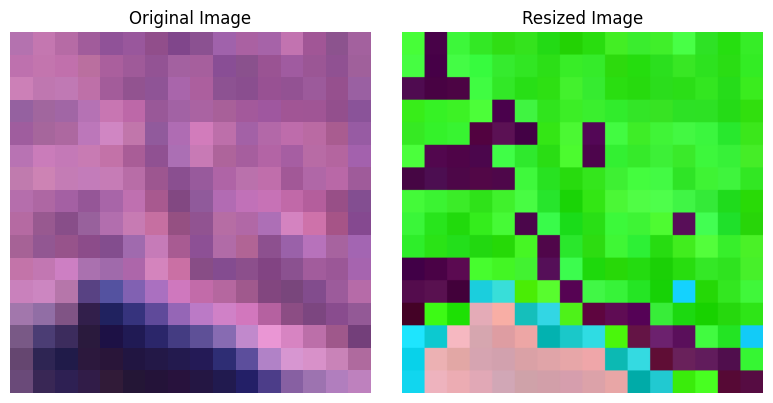

In [25]:
# Load VGG-16 with pretrained weights (excluding the top fully-connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Remove the final classification layers to get feature embeddings
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

# Function to preprocess and extract features from an image
def extract_features(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Resize the image to (224, 224)
    img_original = load_img(image_path)  # Load the original image
    img = img_to_array(img)
    img_original = img_to_array(img_original)
    img = np.expand_dims(img, axis=0)
    img_original = np.expand_dims(img_original, axis=0)
    img = keras.applications.vgg16.preprocess_input(img)
    features = model.predict(img)
    return features, img[0], img_original[0]  # Return feature embeddings, resized image, and original image


# Example usage:
image_path = '/mayo_atlas/home/m296984/visual_dictionary_pipeline/test/2000_words_per_slide/ASH_fulm_HE141/image_0_b4a32fd6-97e3-48a0-a83e-f4c7bb136e63.png'
patch_embedding, resized_image, original_image = extract_features(image_path)
print(patch_embedding.shape)

# Plot both the original and resized images side by side
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image.astype(np.uint8))
plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(resized_image.astype(np.uint8))
plt.axis('off')
plt.title("Resized Image")

plt.tight_layout()
plt.show()